# Análisis de Reservas de Hotel
## Introducción
Este proyecto tiene como objetivo realizar un análisis exhaustivo de un conjunto de datos de reservas de hotel. El análisis incluirá la exploración de datos (EDA), un análisis de negocio centrado en el impacto de las cancelaciones en los ingresos, y el entrenamiento y evaluación de modelos de clasificación para predecir el estado de las reservas.

## Diccionario de Datos
Los datos utilizados en este análisis provienen de Kaggle. A continuación, se detalla la fuente y una breve descripción de las columnas:


| Columna | Descripción | Tipo de Variable |
|---|---|---|
| `Booking_ID` | Identificador único de la reserva. | Numérica |
| `no_of_adults` | Número de adultos en la reserva. | Numérica Discreta |
| `no_of_children` | Número de niños en la reserva. | Numérica Discreta |
| `no_of_weekend_nights` | Número de noches de fin de semana reservadas. | Numérica Discreta |
| `no_of_week_nights` | Número de noches de entre semana reservadas. | Numérica Discreta |
| `type_of_meal_plan` | Tipo de plan de comidas. | Categórica |
| `required_car_parking_space` | Indica si se requiere espacio de estacionamiento. | Categórica Binaria |
| `room_type_reserved` | Tipo de habitación reservada. | Categórica |
| `lead_time` | Número de días entre la fecha de reserva y la fecha de llegada. | Numérica Discreta |
| `arrival_year` | Año de llegada. | Temporal |
| `arrival_month` | Mes de llegada. | Temporal |
| `arrival_date` | Día de llegada. | Temporal |
| `market_segment_type` | Tipo de segmento de mercado (ej. Online, Offline, etc.). | Categórica |
| `repeated_guest` | Indica si el huésped es recurrente. | Categórica Binaria |
| `no_of_previous_cancellations` | Número de cancelaciones previas del huésped. | Numérica Discreta |
| `no_of_previous_bookings_not_canceled` | Número de reservas previas no canceladas por el huésped. | Numérica Discreta |
| `avg_price_per_room` | Precio promedio por habitación por noche. | Numérica Continua |
| `no_of_special_requests` | Número de solicitudes especiales realizadas por el huésped. | Numérica Discreta |
| `booking_status` | Estado de la reserva. | Categórica Binaria |

- **Fuente de los datos**: [Hotel Reservations Classification Dataset](https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset?resource=download)

# EDA

## Variables numéricas

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
df = pd.read_csv('data/Hotel Reservations.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [46]:
# Seleccionar solo las columnas numéricas, excluyendo variables temporales
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
temporal_cols = ['arrival_year', 'arrival_month', 'arrival_date']
numerical_cols = [col for col in numerical_cols if col not in temporal_cols]
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

# Excluir 'Booking_ID' si es numérica pero no relevante para estadísticas descriptivas
if 'Booking_ID' in numerical_cols:
    numerical_cols.remove('Booking_ID')

print("\nEstadísticas descriptivas de las variables numéricas:")
print(df[numerical_cols].describe().T)


Estadísticas descriptivas de las variables numéricas:
                                        count         mean        std     min  \
no_of_adults                          36275.0     1.844962   0.518715     0.0   
no_of_children                        36275.0     0.105279   0.402648     0.0   
no_of_weekend_nights                  36275.0     0.810724   0.870644     0.0   
no_of_week_nights                     36275.0     2.204300   1.410905     0.0   
required_car_parking_space            36275.0     0.030986   0.173281     0.0   
lead_time                             36275.0    85.232557  85.930817     0.0   
arrival_year                          36275.0  2017.820427   0.383836  2017.0   
arrival_month                         36275.0     7.423653   3.069894     1.0   
arrival_date                          36275.0    15.596995   8.740447     1.0   
repeated_guest                        36275.0     0.025637   0.158053     0.0   
no_of_previous_cancellations          36275.0     0.02

### Distribuciones

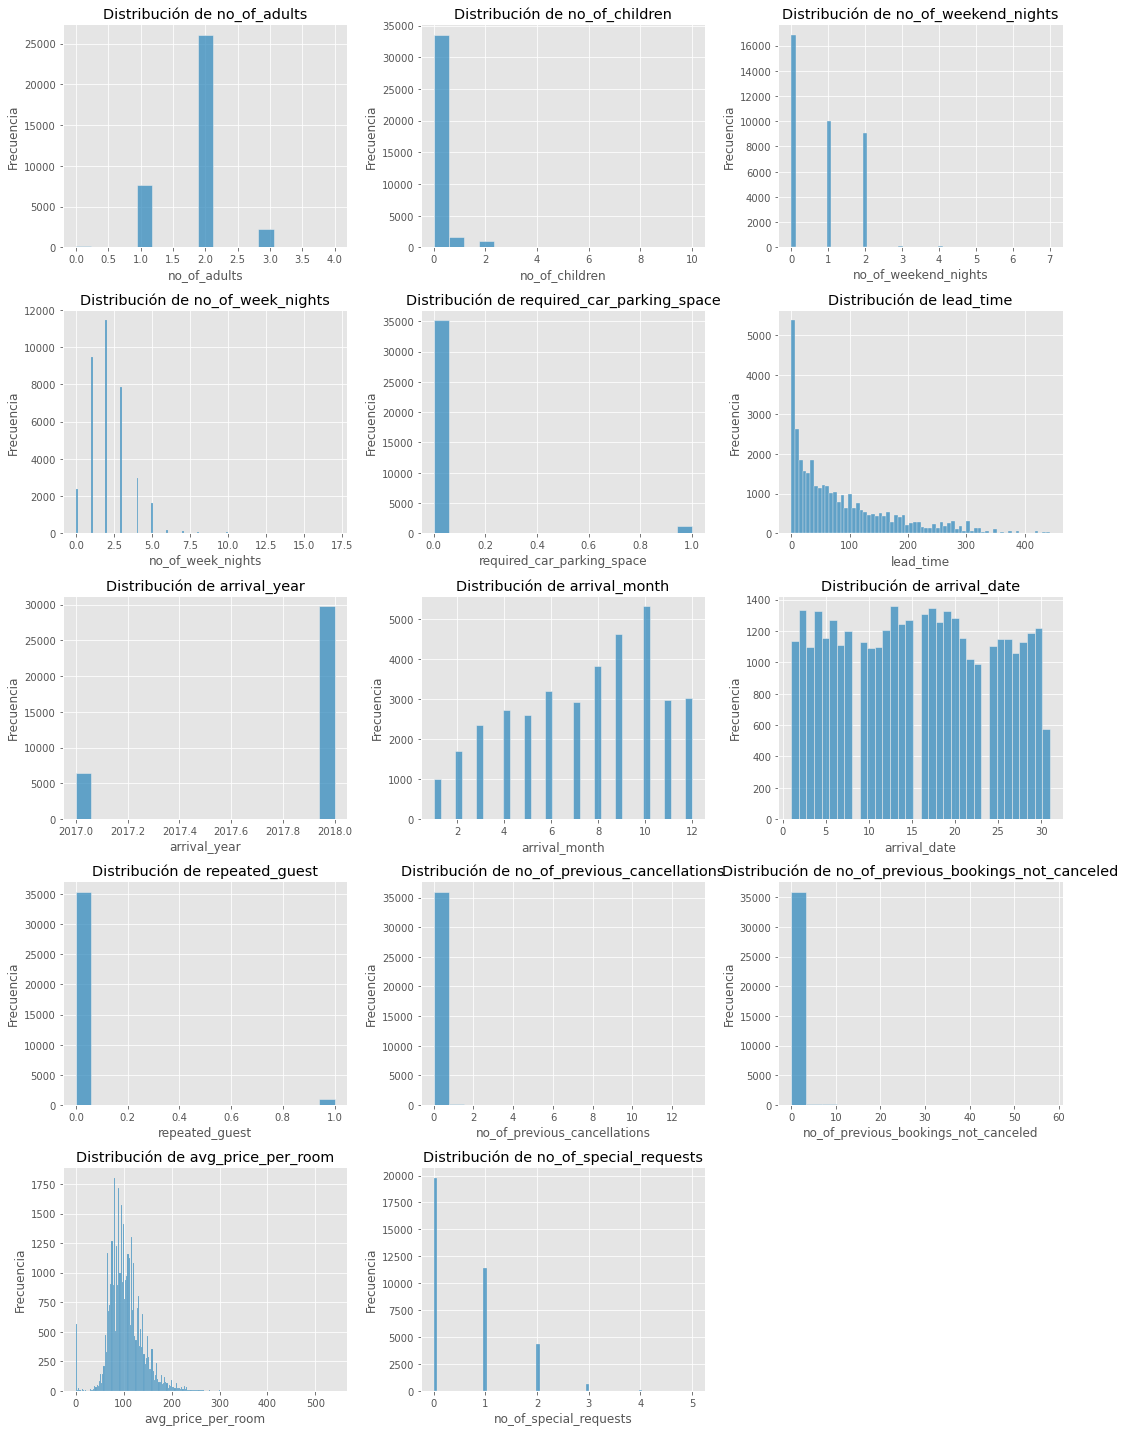

In [47]:
# Visualizar distribuciones de variables numéricas
import math

num_vars = len(numerical_cols)
n_cols = 3
n_rows = math.ceil(num_vars / n_cols)

plt.figure(figsize=(5 * n_cols, 4 * n_rows))
for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(df[col], kde=False)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

### Boxplot

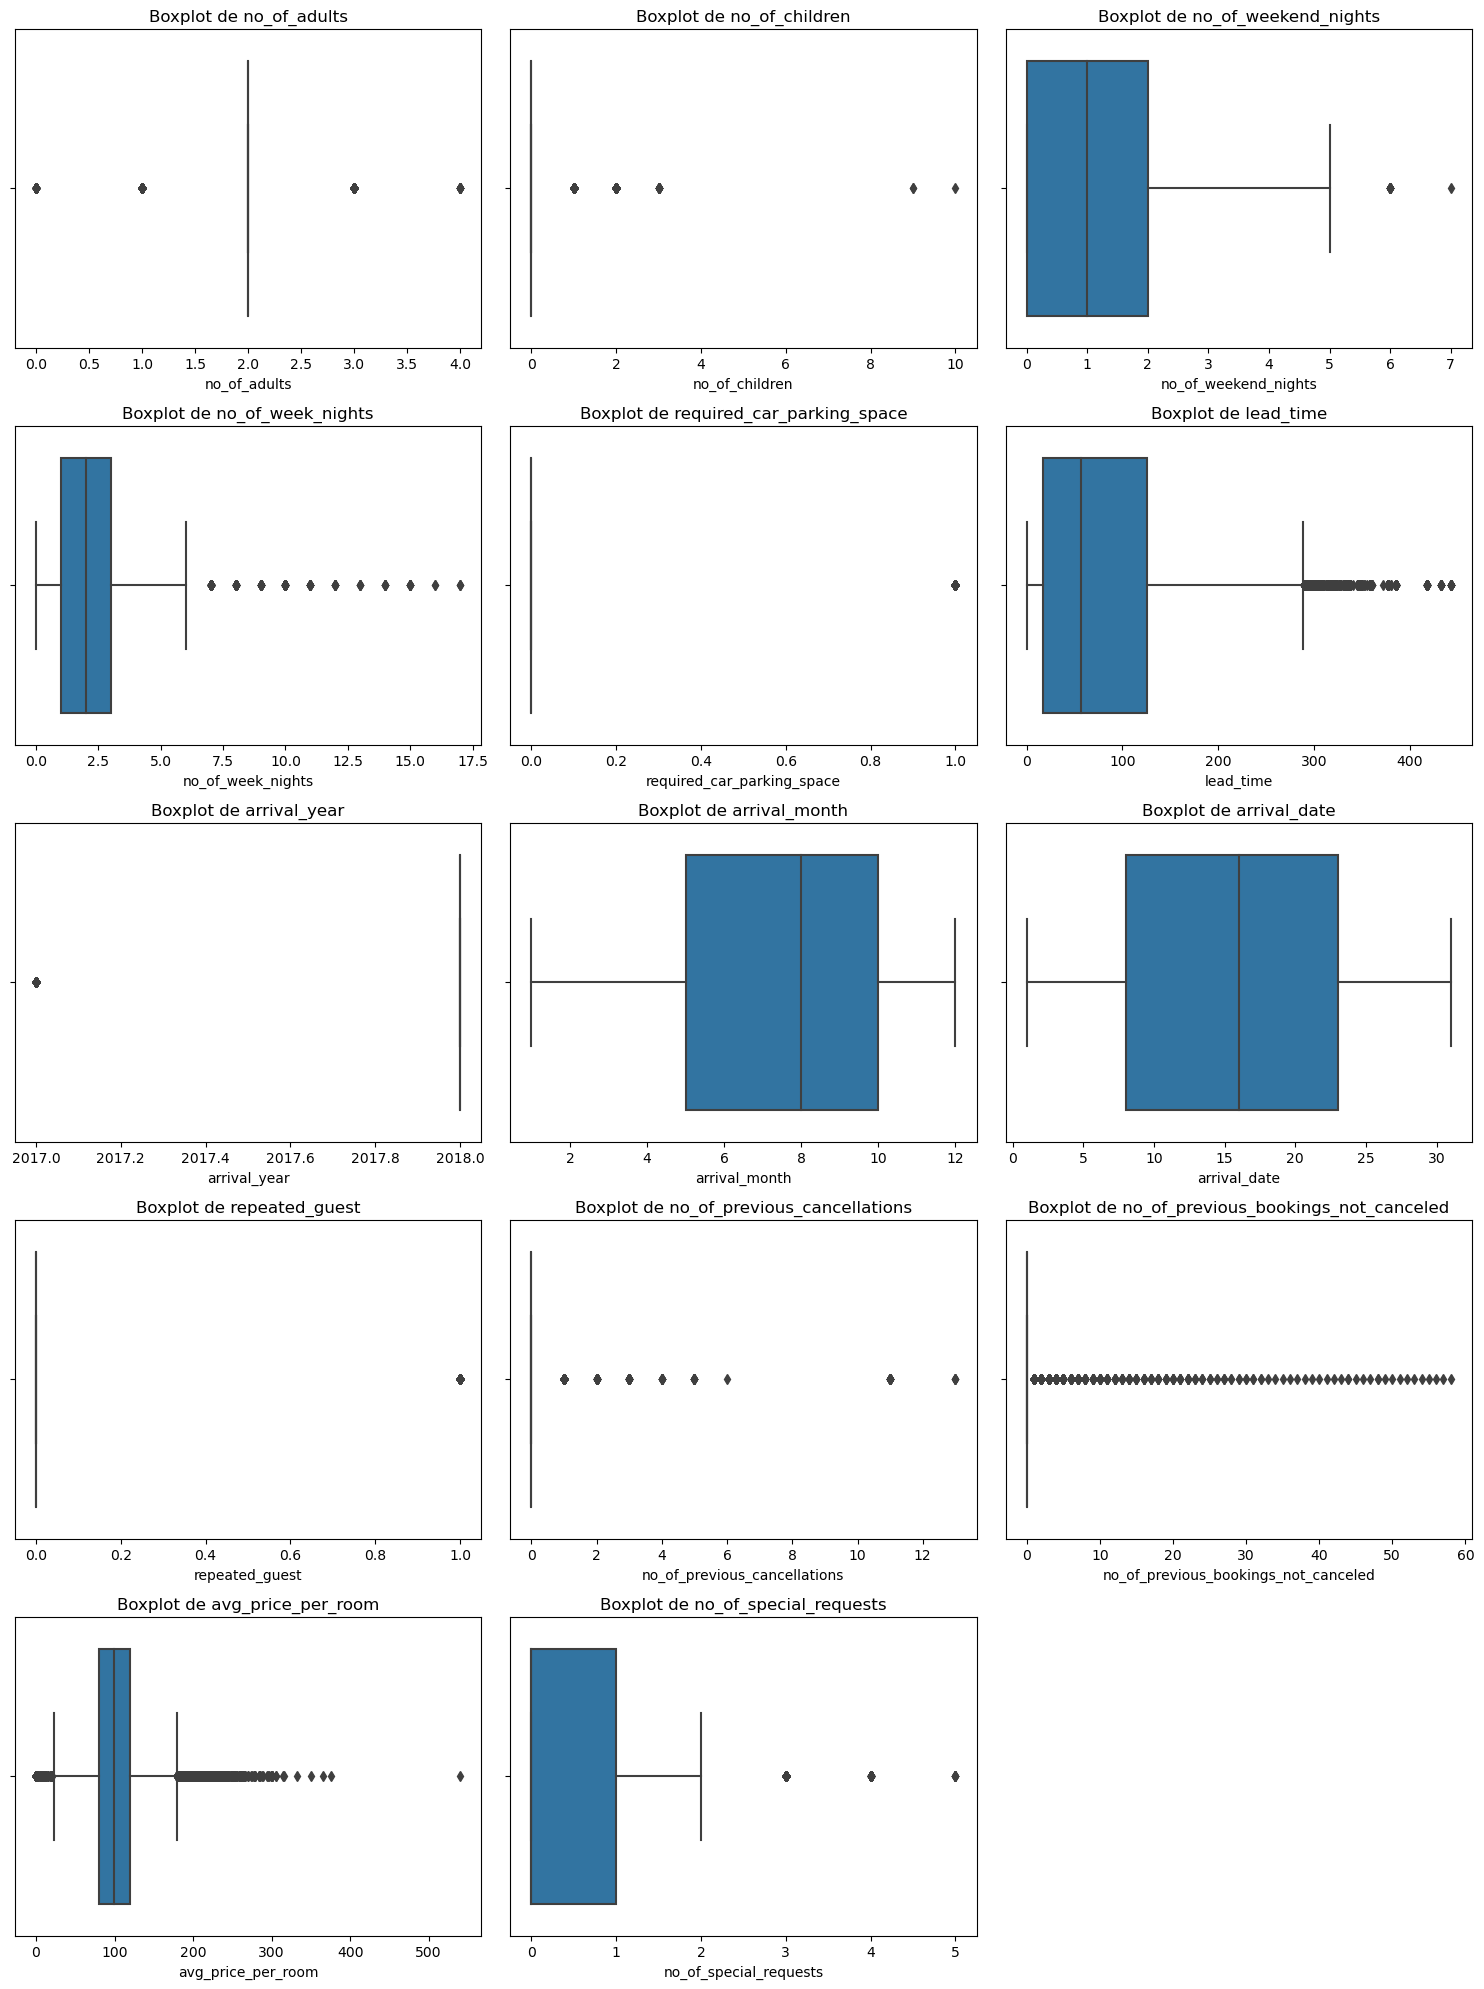

In [57]:
import math

# Resetear el estilo de seaborn para evitar colores personalizados
sns.reset_defaults()

# Boxplots individuales para cada variable numérica en un grid
num_vars = len(numerical_cols)
n_cols = 3
n_rows = math.ceil(num_vars / n_cols)

plt.figure(figsize=(5 * n_cols, 4 * n_rows))
for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(x=df[col], orient='h')
    plt.title(f'Boxplot de {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

### Outliers


In [49]:
# Calcular outliers usando el método del rango intercuartílico (IQR) para cada variable numérica
outliers_summary = []

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    outliers_count = outliers.shape[0]
    outliers_summary.append({'Variable': col, 'Cantidad de outliers': outliers_count})

# Crear DataFrame y ordenar en orden descendente
outliers_df = pd.DataFrame(outliers_summary).sort_values('Cantidad de outliers', ascending=False).reset_index(drop=True)
display(outliers_df)

,Variable,Cantidad de outliers
0,no_of_adults,10167
1,arrival_year,6514
2,no_of_children,2698
3,avg_price_per_room,1696
4,lead_time,1331
5,required_car_parking_space,1124
6,repeated_guest,930
7,no_of_previous_bookings_not_canceled,812
8,no_of_special_requests,761
9,no_of_previous_cancellations,338


### Tabla de correlaciones


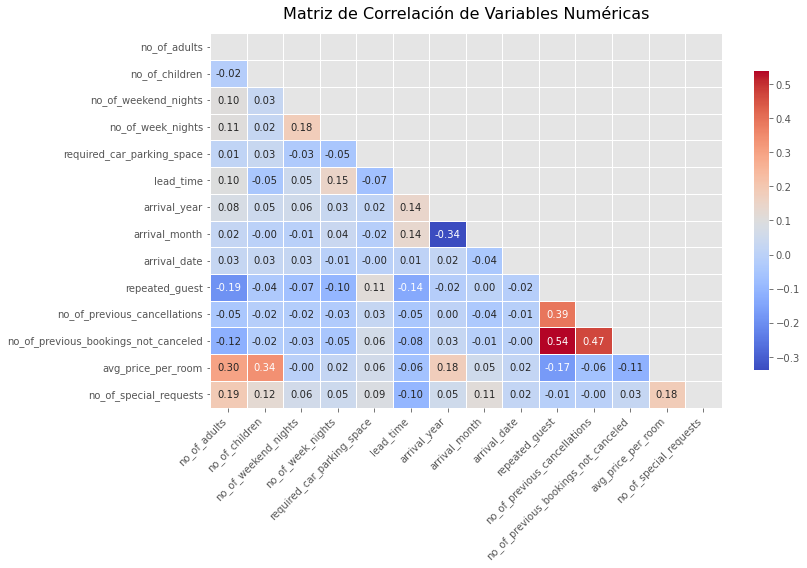

In [50]:
# Calcular la matriz de correlación
correlation_matrix = df[numerical_cols].corr()

# Generar una máscara para la mitad superior
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix,
    mask=mask,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)
plt.title('Matriz de Correlación de Variables Numéricas', fontsize=16, pad=15)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

#### Correlaciones mas importantes

In [51]:
# Calcular las 10 correlaciones absolutas más altas (sin duplicados ni autocoorelaciones)

# Obtener la parte triangular superior de la matriz de correlación (excluyendo la diagonal)
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Apilar la matriz para obtener pares de variables y sus correlaciones
stacked_corr = upper_tri.stack().reset_index()

# Renombrar las columnas
stacked_corr.columns = ['Variable 1', 'Variable 2', 'Correlación']

# Calcular la correlación absoluta
stacked_corr['Correlación Absoluta'] = stacked_corr['Correlación'].abs()

# Ordenar por correlación absoluta de forma descendente
top_corr_pairs = stacked_corr.sort_values(by='Correlación Absoluta', ascending=False)

# Seleccionar las 10 correlaciones más altas
top_10_corr_full = top_corr_pairs.head(10).reset_index(drop=True)

# Mostrar la tabla de las 10 correlaciones más importantes con correlación y valor absoluto
display(top_10_corr_full)

,Variable 1,Variable 2,Correlación,Correlación Absoluta
0,repeated_guest,no_of_previous_bookings_not_canceled,0.539156,0.539156
1,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,0.468147,0.468147
2,repeated_guest,no_of_previous_cancellations,0.390810,0.390810
3,arrival_year,arrival_month,-0.339689,0.339689
4,no_of_children,avg_price_per_room,0.337728,0.337728
5,no_of_adults,avg_price_per_room,0.296886,0.296886
6,no_of_adults,repeated_guest,-0.192277,0.192277
7,no_of_adults,no_of_special_requests,0.189401,0.189401
8,avg_price_per_room,no_of_special_requests,0.184381,0.184381
9,no_of_weekend_nights,no_of_week_nights,0.179577,0.179577


### Observaciones

## Variables categóricas

### Distribuciones

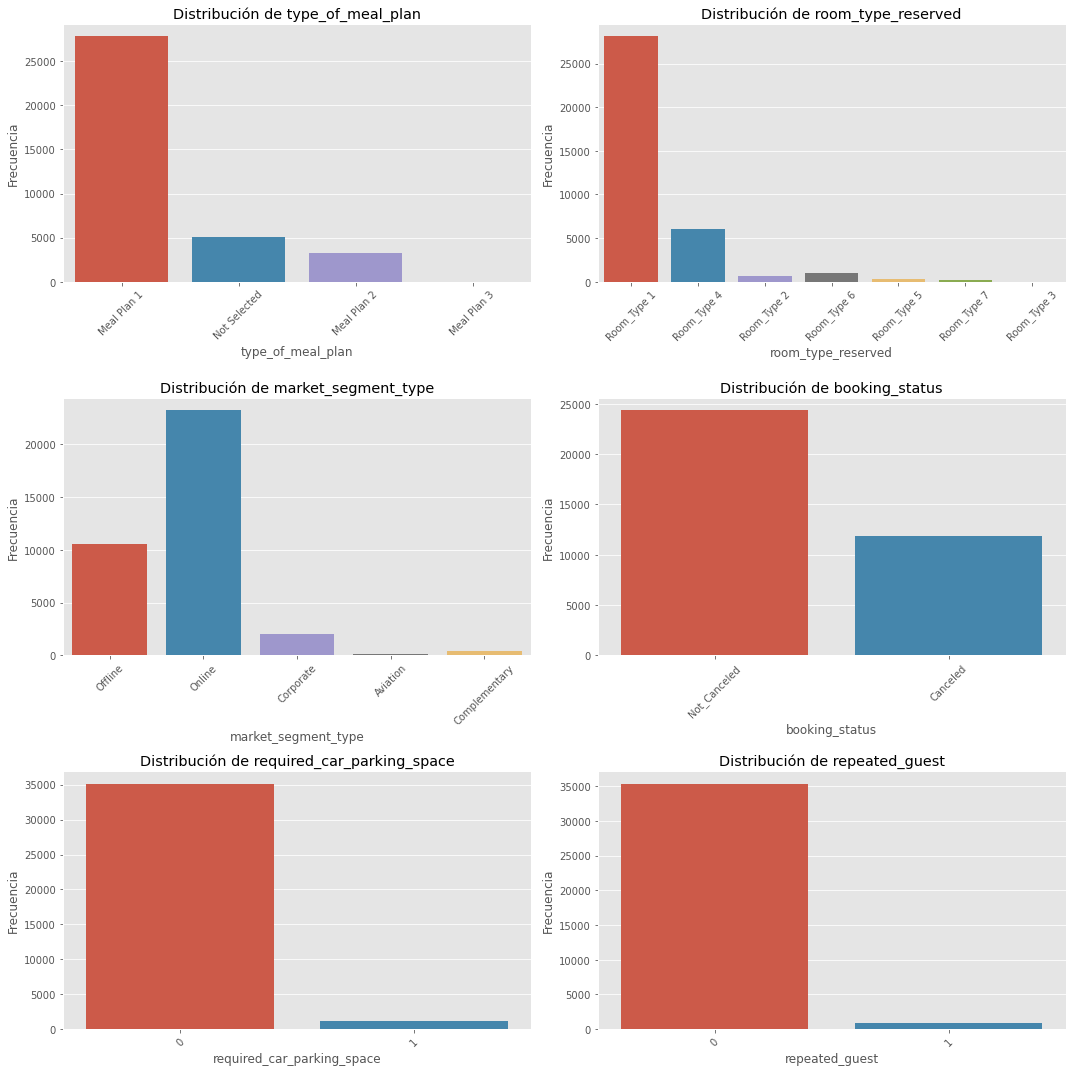

In [52]:

# Seleccionar solo las columnas categóricas
categorical_cols = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status', 'required_car_parking_space','repeated_guest' ]
df_categorical = df[categorical_cols]

# Configurar el grid layout para los gráficos
n_cols = 2
n_rows = math.ceil(len(categorical_cols) / n_cols)

plt.figure(figsize=(15, 5 * n_rows))
for i, col in enumerate(categorical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.countplot(data=df, x=col)
    plt.title(f'Distribución de {col}')
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()


### Frecuencias absolutas y relativas



In [53]:
# Configurar estilo para las tablas
plt.style.use('ggplot')
from IPython.display import HTML, display

display(HTML("<style>.container { width:100% !important; }</style>"))

# Crear función para mostrar tablas con título
def display_freq_table(col):
    freq_table = pd.DataFrame({
        'Frecuencia Absoluta': df[col].value_counts(),
        'Frecuencia Relativa (%)': (df[col].value_counts(normalize=True) * 100).round(2)
    })
    
    display(HTML(f"<h3 style='text-align: center;'>Distribución de {col}</h3>"))
    display(HTML(f"<div style='display: flex; justify-content: center;'><div style='margin: 10px;'>{freq_table.to_html()}</div></div>"))

# Mostrar tablas para cada variable categórica
for col in categorical_cols:
    display_freq_table(col)


,Frecuencia Absoluta,Frecuencia Relativa (%)
Meal Plan 1,27835,76.73
Not Selected,5130,14.14
Meal Plan 2,3305,9.11
Meal Plan 3,5,0.01


,Frecuencia Absoluta,Frecuencia Relativa (%)
Room_Type 1,28130,77.55
Room_Type 4,6057,16.70
Room_Type 6,966,2.66
Room_Type 2,692,1.91
Room_Type 5,265,0.73
Room_Type 7,158,0.44
Room_Type 3,7,0.02


,Frecuencia Absoluta,Frecuencia Relativa (%)
Online,23214,63.99
Offline,10528,29.02
Corporate,2017,5.56
Complementary,391,1.08
Aviation,125,0.34


,Frecuencia Absoluta,Frecuencia Relativa (%)
Not_Canceled,24390,67.24
Canceled,11885,32.76


,Frecuencia Absoluta,Frecuencia Relativa (%)
0,35151,96.9
1,1124,3.1


,Frecuencia Absoluta,Frecuencia Relativa (%)
0,35345,97.44
1,930,2.56


### Observaciones

### Principales conclusiones de las tablas de contingencia

- **Relación entre tipo de comida y estado de la reserva:** El plan de comidas más popular es "Meal Plan 1", tanto en reservas canceladas como no canceladas. Sin embargo, la proporción de cancelaciones varía ligeramente entre los diferentes planes, lo que podría indicar preferencias o políticas asociadas a cada plan.

- **Tipo de habitación y estado de la reserva:** La mayoría de las reservas corresponden a "Room_Type 1", que también presenta la mayor cantidad de cancelaciones y no cancelaciones. Algunas habitaciones, como "Room_Type 3" y "Room_Type 7", tienen muy pocas reservas y cancelaciones, lo que sugiere que son menos populares o están destinadas a segmentos específicos.

- **Segmento de mercado y estado de la reserva:** El segmento "Online" es el más frecuente y también concentra la mayor cantidad de cancelaciones, seguido por "Offline". Los segmentos "Corporate" y "Complementary" presentan tasas de cancelación mucho menores, lo que puede estar relacionado con la naturaleza de sus reservas (por ejemplo, viajes de negocios o acuerdos corporativos).

- **Interacción entre variables categóricas:** Se observan patrones claros de preferencia entre ciertos segmentos de mercado y tipos de habitación o planes de comida. Por ejemplo, el segmento "Online" tiende a reservar principalmente "Room_Type 1" y "Meal Plan 1".

- **Implicaciones para el negocio:** Las cancelaciones se concentran en los segmentos y tipos de productos más populares, lo que puede tener un impacto significativo en los ingresos y la planificación operativa del hotel. Identificar estos patrones permite enfocar estrategias para reducir cancelaciones en los segmentos más críticos.

## Variables temporales


### Distribuciones


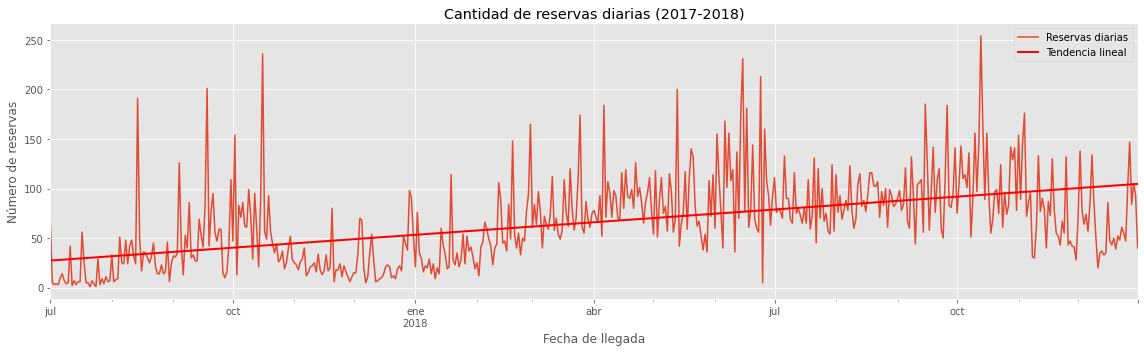

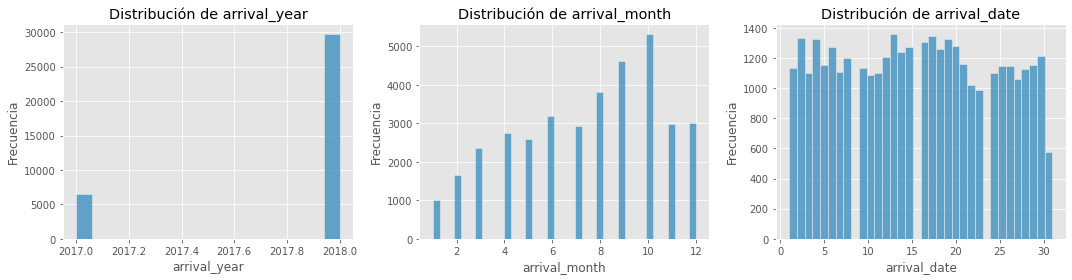

In [54]:
# Asegurarse de que las variables temporales sean del tipo adecuado
# Convertir las columnas de fecha a tipo datetime
# Asegurarse de que las variables temporales sean del tipo adecuado
# Convertir las columnas de fecha a tipo datetime y manejar fechas inválidas
df['arrival_date_complete'] = pd.to_datetime(df['arrival_year'].astype(str) + '-' + df['arrival_month'].astype(str) + '-' + df['arrival_date'].astype(str), errors='coerce')

# Eliminar filas con fechas inválidas
df.dropna(subset=['arrival_date_complete'], inplace=True)
# Agrupar por fecha completa y contar el número de reservas diarias
daily_reservations = df.groupby('arrival_date_complete').size()

# Agregar un gráfico de líneas de la cantidad de reservas diarias durante los 2 años con línea de tendencia lineal
plt.figure(figsize=(16, 5))
daily_reservations.plot(label='Reservas diarias')

# Línea de tendencia lineal
x = np.arange(len(daily_reservations))
y = daily_reservations.values
coef = np.polyfit(x, y, 1)
linear_trend = np.polyval(coef, x)
plt.plot(daily_reservations.index, linear_trend, color='red', linewidth=2, label='Tendencia lineal')

plt.title('Cantidad de reservas diarias (2017-2018)')
plt.xlabel('Fecha de llegada')
plt.ylabel('Número de reservas')
plt.legend()
plt.tight_layout()
plt.show()

df['arrival_year'] = df['arrival_year'].astype(int)
df['arrival_month'] = df['arrival_month'].astype(int)
df['arrival_date'] = df['arrival_date'].astype(int)

# Visualizar distribuciones de variables temporales
num_vars = len(temporal_cols)
n_cols = 3
n_rows = math.ceil(num_vars / n_cols)

plt.figure(figsize=(5 * n_cols, 4 * n_rows))
for i, col in enumerate(temporal_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(df[col], kde=False)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()



# Analisis de negocio

"Aquí va la introducción del análisis  de negocio"

## Cancelaciones anuales


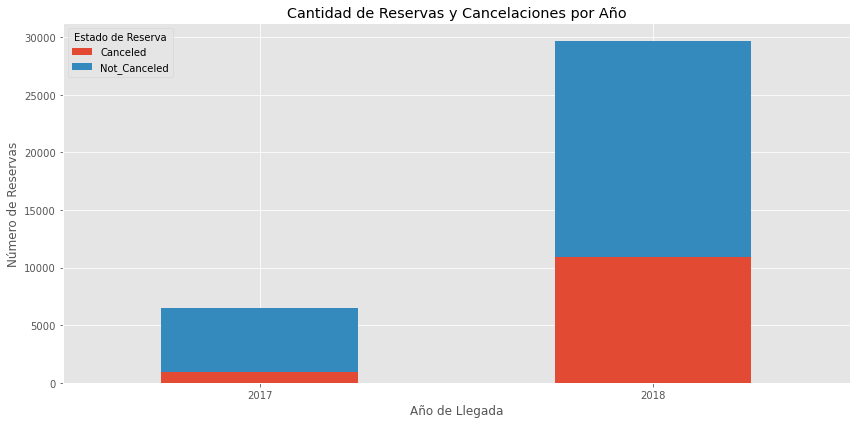

In [55]:
# Agrupar por año y estado de reserva, y contar el número de reservas
reservations_by_year_status = df.groupby(['arrival_year', 'booking_status']).size().unstack(fill_value=0)

# Crear un gráfico de barras apiladas
reservations_by_year_status.plot(kind='bar', stacked=True, figsize=(12, 6))

# Configurar el gráfico
plt.title('Cantidad de Reservas y Cancelaciones por Año')
plt.xlabel('Año de Llegada')
plt.ylabel('Número de Reservas')
plt.xticks(rotation=0)
plt.legend(title='Estado de Reserva')
plt.tight_layout()
plt.show()

In [62]:
# Calcular reservas totales, cancelaciones, ingresos por reservas y pérdidas por cancelación por año
# Calcular reservas totales, cancelaciones, ingresos por reservas y pérdidas por cancelación por año
annual_analysis = df.groupby('arrival_year').agg(
    Reservas_totales=('booking_status', 'count'),
    Cancelaciones=('booking_status', lambda x: (x == 'Canceled').sum()),
    Ingresos_Reservas=('avg_price_per_room', lambda x: (x[df['booking_status'] == 'Not_Canceled']).sum()),
    Perdidas_por_Cancelacion=('avg_price_per_room', lambda x: (x[df['booking_status'] == 'Canceled']).sum())
).reset_index()

# Calcular el porcentaje de pérdidas
annual_analysis['Porcentaje_Perdidas'] = (annual_analysis['Perdidas_por_Cancelacion'] / annual_analysis['Ingresos_Reservas'] * 100).round(2)

# Mostrar la tabla resultante de manera más estética
styled_annual_analysis = annual_analysis.style.set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#333333'), ('color', 'white'), ('font-weight', 'bold')]},
    {'selector': 'td', 'props': [('border', '1px solid #ddd'), ('padding', '8px')]}
]).set_caption("Análisis Anual de Reservas y Cancelaciones").format({
    'Reservas_totales': '{:,}',
    'Cancelaciones': '{:,}',
    'Ingresos_Reservas': '${:,.2f}',
    'Perdidas_por_Cancelacion': '${:,.2f}',
    'Porcentaje_Perdidas': '{:.2f}%'
})

display(styled_annual_analysis)
annual_analysis = df.groupby('arrival_year').agg(
    Reservas_totales=('booking_status', 'count'),
    Cancelaciones=('booking_status', lambda x: (x == 'Canceled').sum()),
    Ingresos_Reservas=('avg_price_per_room', lambda x: (x[df['booking_status'] == 'Not_Canceled']).sum()),
    Perdidas_por_Cancelacion=('avg_price_per_room', lambda x: (x[df['booking_status'] == 'Canceled']).sum())
).reset_index()

# Mostrar la tabla resultante
display(annual_analysis)

,arrival_year,Reservas_totales,Cancelaciones,Ingresos_Reservas,Perdidas_por_Cancelacion,Porcentaje_Perdidas
0,2017,"6,514",961,"$496,483.11","$89,958.62",18.12%
1,2018,"29,724","10,917","$1,938,075.26","$1,223,842.41",63.15%


,arrival_year,Reservas_totales,Cancelaciones,Ingresos_Reservas,Perdidas_por_Cancelacion
0,2017,6514,961,496483.11,89958.62
1,2018,29724,10917,1938075.26,1223842.41


"Comentar aquí un poco lo que se ve desde una persepectiva analítica de negocio"

## Cancelaciones mensuales

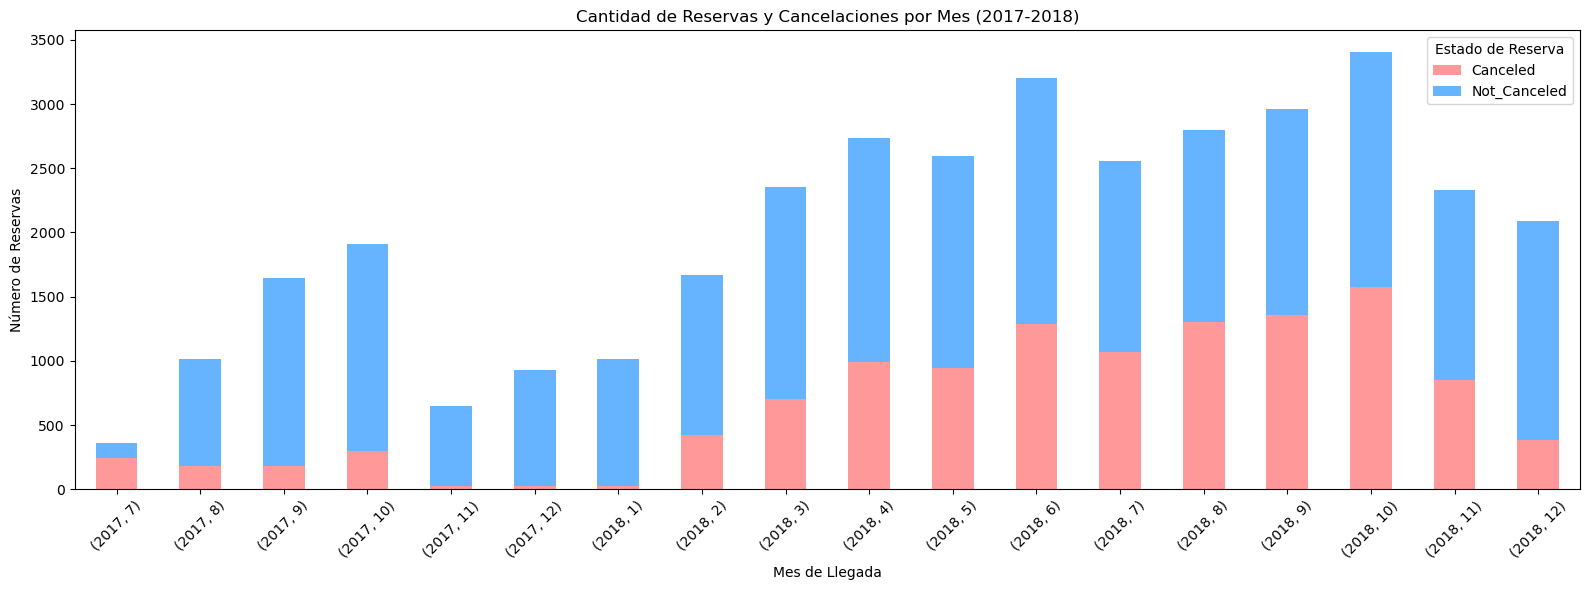

In [65]:
# Agrupar por mes y año, y contar el número de reservas y cancelaciones
monthly_reservations = df.groupby(['arrival_year', 'arrival_month', 'booking_status']).size().unstack(fill_value=0)

# Crear un gráfico de barras apiladas con colores personalizados
colors = ['#FF9999','#66B3FF']
monthly_reservations.plot(kind='bar', stacked=True, figsize=(16, 6), color=colors)

# Configurar el gráfico
plt.title('Cantidad de Reservas y Cancelaciones por Mes (2017-2018)')
plt.xlabel('Mes de Llegada')
plt.ylabel('Número de Reservas')
plt.xticks(rotation=45)
plt.legend(title='Estado de Reserva')
plt.tight_layout()
plt.show()

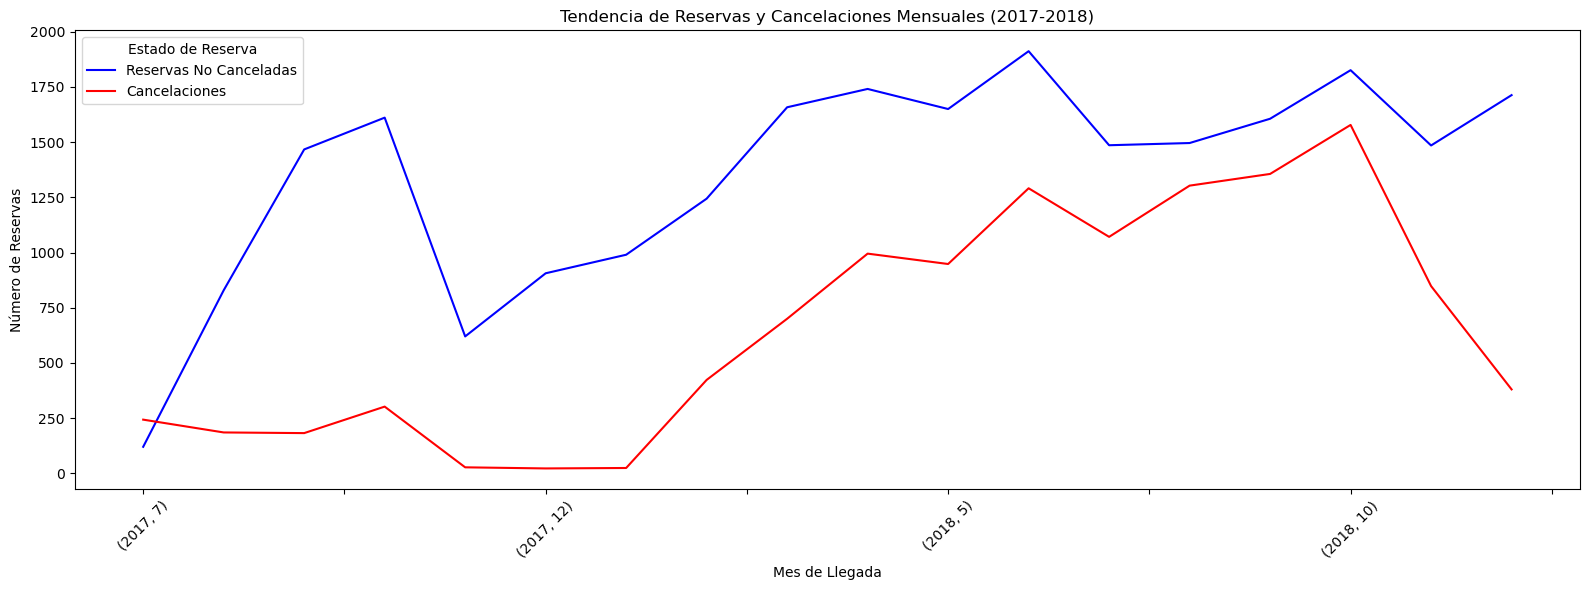

In [66]:
# Agrupar por mes y año, y contar el número de reservas y cancelaciones
monthly_reservations = df.groupby(['arrival_year', 'arrival_month', 'booking_status']).size().unstack(fill_value=0)

# Crear un gráfico de líneas para reservas y cancelaciones
plt.figure(figsize=(16, 6))
monthly_reservations['Not_Canceled'].plot(label='Reservas No Canceladas', color='blue')
monthly_reservations['Canceled'].plot(label='Cancelaciones', color='red')

# Configurar el gráfico
plt.title('Tendencia de Reservas y Cancelaciones Mensuales (2017-2018)')
plt.xlabel('Mes de Llegada')
plt.ylabel('Número de Reservas')
plt.xticks(rotation=45)
plt.legend(title='Estado de Reserva')
plt.tight_layout()
plt.show()

In [69]:
# Agrupar por año y mes, y contar el número de reservas y cancelaciones
monthly_reservations = df.groupby(['arrival_year', 'arrival_month']).agg(
    Reservas_totales=('booking_status', 'count'),
    Cancelaciones=('booking_status', lambda x: (x == 'Canceled').sum())
).reset_index()

# Calcular el porcentaje de cancelaciones por mes
monthly_reservations['Porcentaje_cancelaciones_mes'] = (monthly_reservations['Cancelaciones'] / monthly_reservations['Reservas_totales'] * 100).round(2)

# Calcular el total de cancelaciones por año
annual_cancellations = monthly_reservations.groupby('arrival_year')['Cancelaciones'].sum().reset_index()
annual_cancellations.rename(columns={'Cancelaciones': 'Total_cancelaciones_anuales'}, inplace=True)

# Unir el total de cancelaciones anuales con los datos mensuales
monthly_reservations = monthly_reservations.merge(annual_cancellations, on='arrival_year')

# Calcular el porcentaje de cancelaciones sobre el total del año
monthly_reservations['Porcentaje_cancelaciones_sobre_total_anual'] = (monthly_reservations['Cancelaciones'] / monthly_reservations['Total_cancelaciones_anuales'] * 100).round(2)

# Renombrar la columna arrival_month para que sea más descriptiva
monthly_reservations.rename(columns={'arrival_month': 'Mes'}, inplace=True)

# Mostrar la tabla resultante
display(monthly_reservations)

,arrival_year,Mes,Reservas_totales,Cancelaciones,Porcentaje_cancelaciones_mes,Total_cancelaciones_anuales,Porcentaje_cancelaciones_sobre_total_anual
0,2017,7,363,243,66.94,961,25.29
1,2017,8,1014,185,18.24,961,19.25
2,2017,9,1649,182,11.04,961,18.94
3,2017,10,1913,302,15.79,961,31.43
4,2017,11,647,27,4.17,961,2.81
5,2017,12,928,22,2.37,961,2.29
6,2018,1,1014,24,2.37,10917,0.22
7,2018,2,1667,423,25.37,10917,3.87
8,2018,3,2358,700,29.69,10917,6.41
9,2018,4,2736,995,36.37,10917,9.11


## Cancelaciones diarias